# Структурна лінгвістика

In [58]:
words_en=[['truth', 'truthful', 'truthfulness', 'countertruth', 'untruthful', 'truthology'],['flaw', 'flaws', 'flawed', 'flawless', 'flawlessness', 'flawlessly']]
words_ru=[['лес', 'лесной', 'лесник', 'лесничий', 'лесничество', 'пролесье'],['окно', 'окошко', 'подоконник', 'оконный', 'окнище']]
words_uk=[['ліс', 'лісовий', 'лісник', 'лісничий', 'лісництво'],['вікно', 'віконце', 'підвіконня', 'віконний']]
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
from UkrainianStemmer3 import UkrainianStemmer #https://github.com/Amice13/ukr_stemmer/blob/master/ukr_stemmer3.py
import Stemmer  #https://github.com/snowballstem/pystemmer/blob/master/docs/quickstart_python3.txt
#print(Stemmer.algorithms())
#['danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']
stemmer_ru = Stemmer.Stemmer('russian')           #stemmer.stemWord('cycling')
stemmer_porter = Stemmer.Stemmer('porter')
stemmer_en = Stemmer.Stemmer('english')
nltk_stemmer_porter= PorterStemmer()               #stemmer.stem
nltk_stemmer_Snowball_ru = SnowballStemmer("russian")
nltk_stemmer_Snowball_en = SnowballStemmer("english") #stemmer.stem, 
#"arabic", "danish", "dutch", "english", "finnish", "french", "german",
#"hungarian", "italian", "norwegian", "porter", "portuguese",
#"romanian", "russian", "spanish", "swedish"

def compare_stemers(words, stemers):
    stemer_result={}
    df =pd.DataFrame()
    for stemer_name,stemer_func in stemers:
        stemer_result[stemer_name]=[]
        
        for word in words:
            stemer_result[stemer_name].append(stemer_func(word))
        df[stemer_name]=stemer_result[stemer_name]
    return df
        #print('{0}:\t\t{1}'.format(stemer_name, '\t'.join(stemer_result[stemer_name])))

In [60]:
# en
compare_stemers(np.concatenate(words_en),\
                [('word',lambda word: word),\
                 ('stemmer_porter',lambda word: stemmer_porter.stemWord(word)),\
                 ('stemmer_en',lambda word: stemmer_en.stemWord(word)),\
                 ('nltk_stemmer_Snowball_en',lambda word: nltk_stemmer_Snowball_en.stem(word))])

,word,stemmer_porter,stemmer_en,nltk_stemmer_Snowball_en
0,truth,truth,truth,truth
1,truthful,truth,truth,truth
2,truthfulness,truth,truth,truth
3,countertruth,countertruth,countertruth,countertruth
4,untruthful,untruth,untruth,untruth
5,truthology,truthologi,trutholog,trutholog
6,flaw,flaw,flaw,flaw
7,flaws,flaw,flaw,flaw
8,flawed,flaw,flaw,flaw
9,flawless,flawless,flawless,flawless


In [61]:
# ru
compare_stemers(np.concatenate(words_ru),\
                [('word',lambda word: word),\
                 ('stemmer_porter',lambda word: stemmer_porter.stemWord(word)),\
                 ('stemmer_ru',lambda word: stemmer_ru.stemWord(word)),\
                 ('nltk_stemmer_Snowball_ru',lambda word: nltk_stemmer_Snowball_ru.stem(word))])

,word,stemmer_porter,stemmer_ru,nltk_stemmer_Snowball_ru
0,лес,лес,лес,лес
1,лесной,лесной,лесн,лесн
2,лесник,лесник,лесник,лесник
3,лесничий,лесничий,леснич,леснич
4,лесничество,лесничество,лесничеств,лесничеств
5,пролесье,пролесье,пролес,пролес
6,окно,окно,окн,окн
7,окошко,окошко,окошк,окошк
8,подоконник,подоконник,подоконник,подоконник
9,оконный,оконный,окон,окон


In [63]:
# uk
compare_stemers(np.concatenate(words_uk),\
                [('word',lambda word: word),\
                 ('stemmer_porter',lambda word: stemmer_porter.stemWord(word)),\
                 ('stemmer_ru',lambda word: stemmer_ru.stemWord(word)),\
                 ('UkrainianStemmer',lambda word: UkrainianStemmer(word).stem_word())])

,word,stemmer_porter,stemmer_ru,UkrainianStemmer
0,ліс,ліс,ліс,ліс
1,лісовий,лісовий,лісов,лісов
2,лісник,лісник,лісник,лісник
3,лісничий,лісничий,ліснич,ліснич
4,лісництво,лісництво,лісництв,лісництв
5,вікно,вікно,вікно,вікн
6,віконце,віконце,віконц,віконц
7,підвіконня,підвіконня,підвікон,підвіконн
8,віконний,віконний,вікон,віконн


In [65]:
test=['невосприимчивость','несприйнятливість','атиповий','безвідповідально','мореплавання','оподаткувати','перевтілитися','схилившись','трьохярусний','підсніжник','зужиткований']
# uk test task 1
compare_stemers(test,\
                [('word',lambda word: word),\
                 ('stemmer_porter',lambda word: stemmer_porter.stemWord(word)),\
                 ('stemmer_ru',lambda word: stemmer_ru.stemWord(word)),\
                 ('UkrainianStemmer',lambda word: UkrainianStemmer(word).stem_word())])

,word,stemmer_porter,stemmer_ru,UkrainianStemmer
0,невосприимчивость,невосприимчивость,невосприимчив,невосприимчивост
1,несприйнятливість,несприйнятливість,несприйнятливіст,несприйнятливіст
2,атиповий,атиповий,атипов,атипов
3,безвідповідально,безвідповідально,безвідповідальн,безвідповідальн
4,мореплавання,мореплавання,мореплаван,мореплаванн
5,оподаткувати,оподаткувати,оподаткуват,оподаткув
6,перевтілитися,перевтілитися,перевтілит,перевтілит
7,схилившись,схилившись,схил,схил
8,трьохярусний,трьохярусний,трьохярусн,трьохярусн
9,підсніжник,підсніжник,підсніжник,підсніжник


In [ ]:
2 Висновок:
    Стемери: Є реалізації для російської/англійської мов, для української знайшов одін під ліцензією на гітхабі
    Портер стемер - найгірший як на мене, додає лишні символи чомусь
    Як NLTK так і Snowball стемер показують себе однаково
    Основна проблема, корінь реченння погано очищується, залишаються перефікси і суфікси
    PoS не має значення і все може обрізатися до одного корення
    
    Використовувати тільки там де така функцінальність потрібна

In [ ]:
3. Визначте частину мови виділеного слова і зв'язок до його батька (за зразком):

{I} like turtles.: pronoun, nsubj(like, I)
I {like} turtles.: verb, root(ROOT, like)
I like {turtles}.: noun, dobj(like, turtles)

In [105]:
data=[('I like turtles.','I'),\
('I like turtles.','like'),\
('We can but hope that everything will be fine.','but'),\
("It's sad but true.",'but'),\
('Jack brings nothing but trouble.','but'),\
('As we were talking, I realised how to solve the issue.','as'),\
("This hot dog isn't as big as usual.",'as'),\
("This hot dog isn't as big as usual.",'as'),\
("This hot dog isn't as big as I expected.","as"),\
("I work as a teacher.",'as'),\
("Let's do it this way!",'way'),\
("This is way too much!",'way'),\
("The prices are going down.",'down'),\
("Someone pushed him and he fell down the stairs.","down"),\
("I’ve been feeling rather down lately.","down"),\
("It's not easy to down a cup of coffee in one gulp.",'down'),\
("Bring a down jacket and a pair of gloves, and you'll be fine.",'down')]

In [103]:
import spacy
from nltk import Tree
en_nlp = spacy.load('en_core_web_lg')

In [106]:
for text, word in data:
    nlp_doc = en_nlp(text)
    for token in nlp_doc:
        if token.text==word:
            head_name= "ROOT" if token.head.text == word else token.head.text
            print('{0}: {1}, {2}({3}, {4})'.format(text,token.pos_,token.dep_.lower(),head_name, word))

I like turtles.: PRON, nsubj(like, I)
I like turtles.: VERB, root(ROOT, like)
We can but hope that everything will be fine.: CCONJ, cc(can, but)
It's sad but true.: CCONJ, cc(sad, but)
Jack brings nothing but trouble.: ADP, prep(nothing, but)
This hot dog isn't as big as usual.: ADV, advmod(big, as)
This hot dog isn't as big as usual.: ADP, prep(big, as)
This hot dog isn't as big as usual.: ADV, advmod(big, as)
This hot dog isn't as big as usual.: ADP, prep(big, as)
This hot dog isn't as big as I expected.: ADV, advmod(big, as)
This hot dog isn't as big as I expected.: ADP, mark(expected, as)
I work as a teacher.: ADP, prep(work, as)
Let's do it this way!: NOUN, npadvmod(do, way)
This is way too much!: ADV, advmod(much, way)
The prices are going down.: PART, prt(going, down)
Someone pushed him and he fell down the stairs.: ADP, prep(fell, down)
I’ve been feeling rather down lately.: ADV, advmod(feeling, down)
It's not easy to down a cup of coffee in one gulp.: VERB, xcomp('s, down)
Bri

In [114]:
data=[\
('Рада міністрів Європейського союзу затвердила угоду про спрощений порядок видачі віз для України.','віз'),\
('Батько Себастьяна віз на санях їх театральний гурт до Львова.','віз'),\
('А ще дивний елемент інтер’єру – віз із продукцією одного з херсонських виробників.','віз'),\
('У цю мить повз Євгена пролетів останній вагон товарняка.','повз'),\
('Кліпнув очима і побачив малого песика, який саме пробігав повз у бік села.','повз'),\
('Степанко перестав кричати, тільки ламкий стогін повз йому із грудей.','повз'),\
('Часу не гай – декларацію подай!','гай'),\
('І коляд заспівали, і гай врятували.','гай'),\
('Гай, чи ви забулися, братове?','Гай'),\
('Ось присіла на край ліжка.','край'),\
('Поставив ту кузню не край дороги, як було заведено, а на Красній горі, біля Прадуба.','край'),\
('Розповідаючи про передній край лінґвістики, фон Лібіх, як завжди, мислив широко і глобально.','край'),\
('Не край мені серце.','край'),\
('І щойно тоді додаємо до борщу смажену цибулю.','щойно'),\
('Бо щойно я задрімав, віддавши тіло подушці з периною, як мене розбудив поштовх у бік.','щойно')]

In [123]:
morph = pymorphy2.MorphAnalyzer(lang='uk')
for text, word in data:
    word_info = morph.parse(word)[0]
    print('{0}: {1}, {2}, {3}({4}, {5})'.format(text,word_info.tag.POS,word_info.normal_form,' ',' ', word))

Рада міністрів Європейського союзу затвердила угоду про спрощений порядок видачі віз для України.: NOUN, віза,  ( , віз)
Батько Себастьяна віз на санях їх театральний гурт до Львова.: NOUN, віза,  ( , віз)
А ще дивний елемент інтер’єру – віз із продукцією одного з херсонських виробників.: NOUN, віза,  ( , віз)
У цю мить повз Євгена пролетів останній вагон товарняка.: VERB, повзти,  ( , повз)
Кліпнув очима і побачив малого песика, який саме пробігав повз у бік села.: VERB, повзти,  ( , повз)
Степанко перестав кричати, тільки ламкий стогін повз йому із грудей.: VERB, повзти,  ( , повз)
Часу не гай – декларацію подай!: VERB, гаяти,  ( , гай)
І коляд заспівали, і гай врятували.: VERB, гаяти,  ( , гай)
Гай, чи ви забулися, братове?: VERB, гаяти,  ( , Гай)
Ось присіла на край ліжка.: VERB, краяти,  ( , край)
Поставив ту кузню не край дороги, як було заведено, а на Красній горі, біля Прадуба.: VERB, краяти,  ( , край)
Розповідаючи про передній край лінґвістики, фон Лібіх, як завжди, мислив ши

In [ ]:
5 - не зроблено

In [4]:
from nltk.corpus import wordnet as wn
#http://www.nltk.org/howto/wordnet.html
#http://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html#Synset.shortest_path_distance

In [57]:
heart_types = wn.synsets('heart')
[(heart, heart.definition()) for heart in heart_types] 

[(Synset('heart.n.01'), 'the locus of feelings and intuitions'),
 (Synset('heart.n.02'),
  'the hollow muscular organ located behind the sternum and between the lungs; its rhythmic contractions move the blood through the body'),
 (Synset('heart.n.03'), 'the courage to carry on'),
 (Synset('center.n.01'),
  'an area that is approximately central within some larger region'),
 (Synset('kernel.n.03'),
  'the choicest or most essential or most vital part of some idea or experience'),
 (Synset('heart.n.06'), 'an inclination or tendency of a certain kind'),
 (Synset('heart.n.07'),
  'a plane figure with rounded sides curving inward at the top and intersecting at the bottom; conventionally used on playing cards and valentines'),
 (Synset('heart.n.08'),
  'a firm rather dry variety meat (usually beef or veal)'),
 (Synset('affection.n.01'), 'a positive feeling of liking'),
 (Synset('heart.n.10'),
  'a playing card in the major suit that has one or more red hearts on it')]

In [37]:
hypernyms = [(item.hypernyms()[0].name(), item.hypernyms()[0].name()) for item in heart_types]
hypernyms

['intuition.n.02',
 'internal_organ.n.01',
 'courage.n.01',
 'area.n.01',
 'content.n.05',
 'disposition.n.01',
 'plane_figure.n.01',
 'variety_meat.n.01',
 'feeling.n.01',
 'playing_card.n.01']

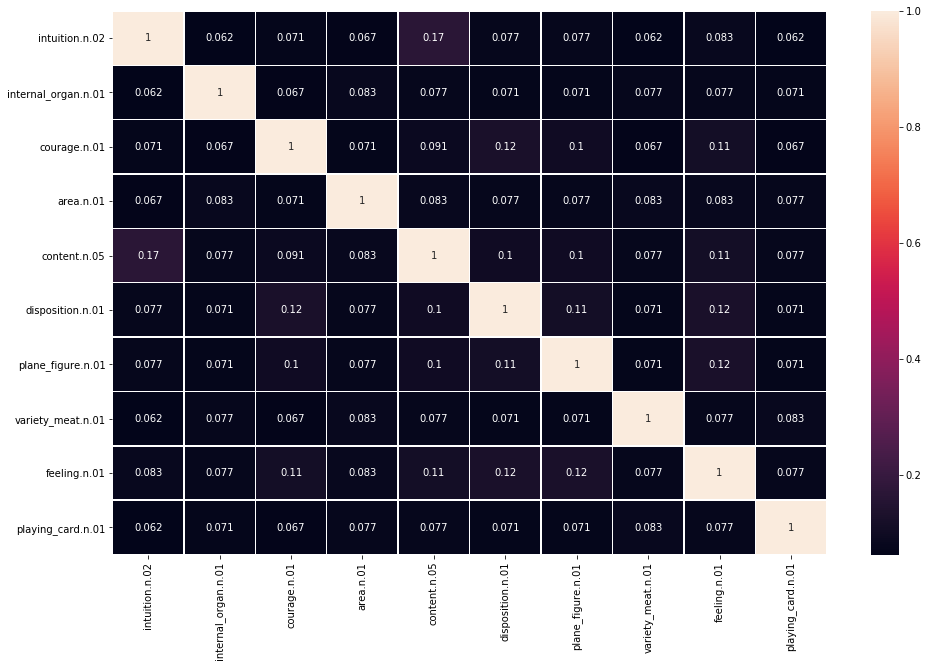

In [55]:
#similarity matrix path_similarity  based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy
similarity_matrix=[]
for i in range(0,len(heart_types)):
    similarity_matrix.append([])
    for j in range(0, len(heart_types)):
        similarity_matrix[i].append(heart_types[i].path_similarity(heart_types[j]))

import pandas as pd
df = pd.DataFrame(similarity_matrix, columns=hypernyms,index=hypernyms)
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches
sns.heatmap(df.iloc[:, :], annot=True, linewidths=.5, ax=ax)

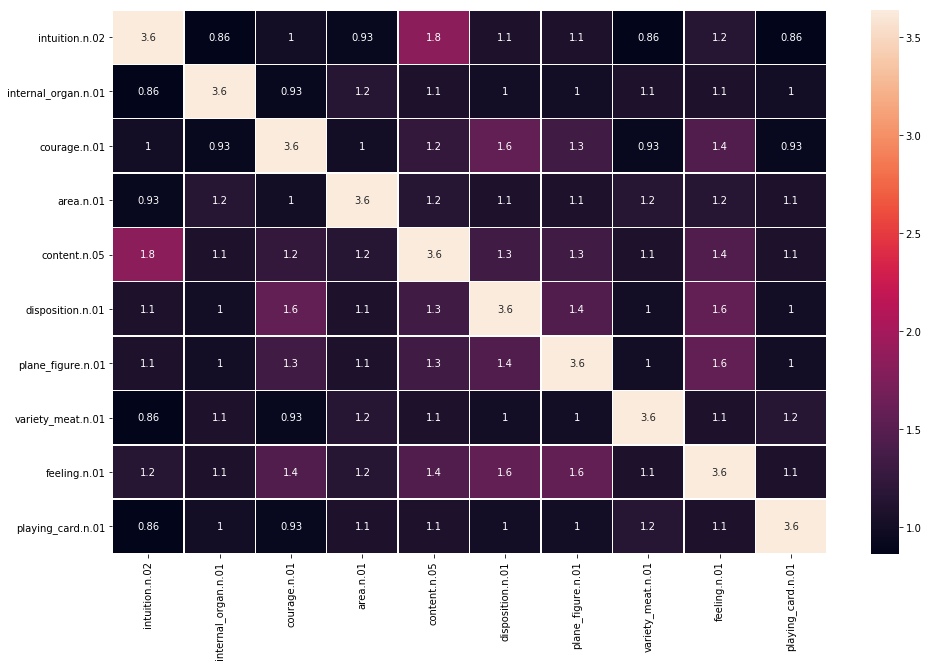

In [58]:
#similarity matrix lch_similarity
similarity_matrix=[]
for i in range(0,len(heart_types)):
    similarity_matrix.append([])
    for j in range(0, len(heart_types)):
        similarity_matrix[i].append(heart_types[i].lch_similarity(heart_types[j]))

import pandas as pd
df = pd.DataFrame(similarity_matrix, columns=hypernyms,index=hypernyms)
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches
sns.heatmap(df.iloc[:, :], annot=True, linewidths=.5, ax=ax)

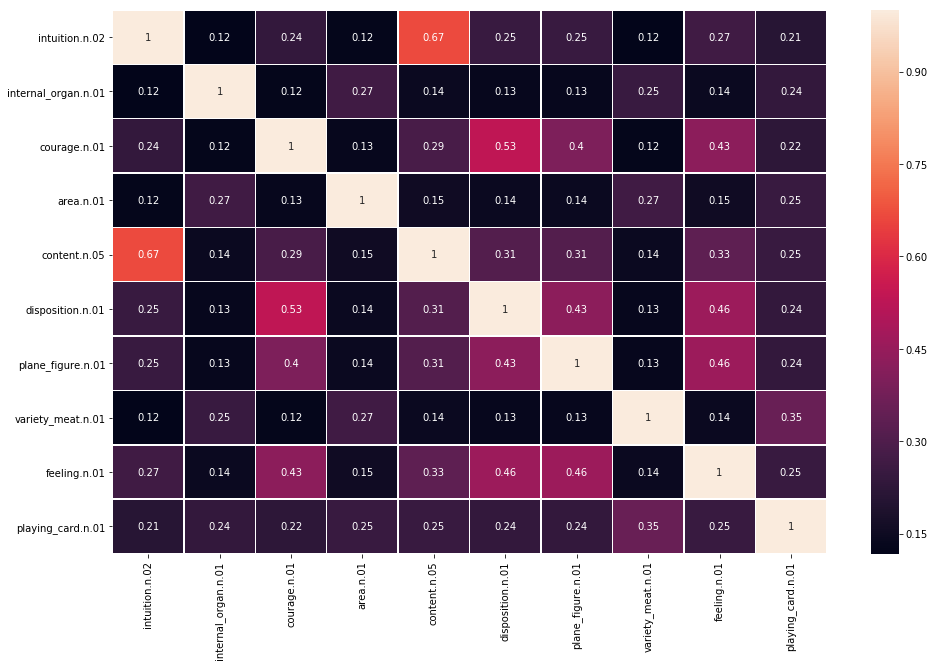

In [59]:
#similarity matrix wup_similarity
similarity_matrix=[]
for i in range(0,len(heart_types)):
    similarity_matrix.append([])
    for j in range(0, len(heart_types)):
        similarity_matrix[i].append(heart_types[i].wup_similarity(heart_types[j]))

import pandas as pd
df = pd.DataFrame(similarity_matrix, columns=hypernyms,index=hypernyms)
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches
sns.heatmap(df.iloc[:, :], annot=True, linewidths=.5, ax=ax)

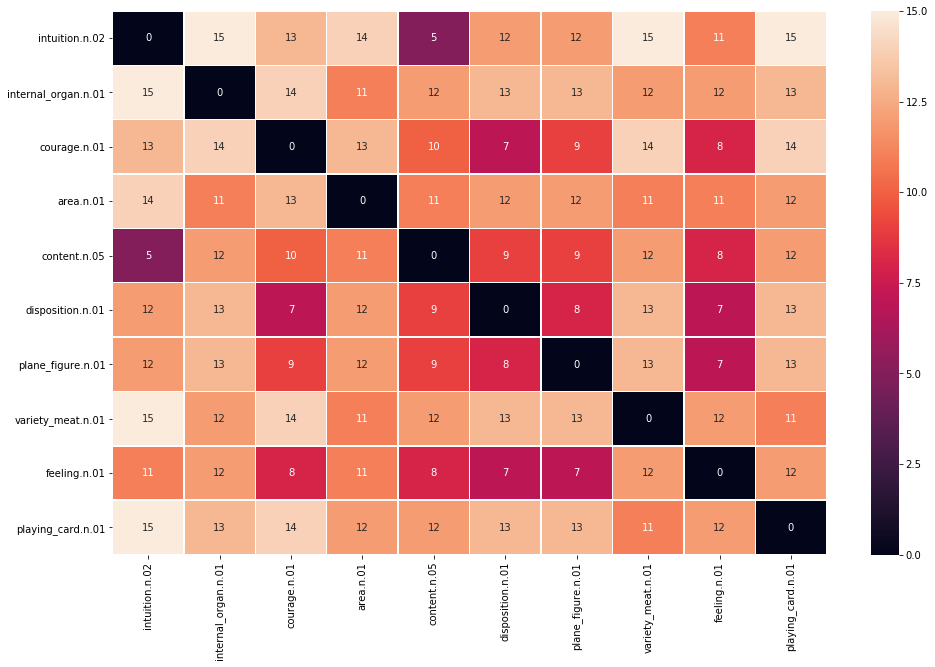

In [86]:
similarity_matrix=[]
for i in range(0,len(heart_types)):
    similarity_matrix.append([])
    for j in range(0, len(heart_types)):
        similarity_matrix[i].append(heart_types[i].shortest_path_distance(heart_types[j]))

import pandas as pd
df = pd.DataFrame(similarity_matrix, columns=hypernyms,index=hypernyms)
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches
sns.heatmap(df.iloc[:, :], annot=True, linewidths=.5, ax=ax)

In [64]:
heart_types[0].hypernym_paths()

[[Synset('entity.n.01'),
  Synset('abstraction.n.06'),
  Synset('psychological_feature.n.01'),
  Synset('cognition.n.01'),
  Synset('content.n.05'),
  Synset('idea.n.01'),
  Synset('impression.n.01'),
  Synset('intuition.n.02'),
  Synset('heart.n.01')]]

In [66]:
heart_types[0].lowest_common_hypernyms(heart_types[1])

[Synset('entity.n.01')]

In [68]:
heart_types[0].shortest_path_distance(heart_types[1])

15

In [99]:
heart_types[0]._shortest_hypernym_paths(heart_types[1])

AttributeError: 'Synset' object has no attribute 'shortest_hypernym_paths'

In [93]:
heart_types[1]._shortest_hypernym_paths(heart_types[0]).keys()

dict_keys([Synset('heart.n.02'), Synset('internal_organ.n.01'), Synset('organ.n.01'), Synset('body_part.n.01'), Synset('part.n.03'), Synset('thing.n.12'), Synset('physical_entity.n.01'), Synset('entity.n.01'), Synset('*ROOT*')])

In [106]:
heart_types[0].hypernyms()[0].hyponyms()

[Synset('heart.n.01')]

In [107]:
heart_types[0].hypernyms()

[Synset('intuition.n.02')]

In [127]:
def print_path(first, second):
    common_root = first.lowest_common_hypernyms(second)[0]
    result=[]
    item =first
    while item!=common_root:      
        result.append(item)
        item=item.hypernyms()[0]
    result.append(common_root)
    item =second
    sub_list=[]
    while item!=common_root:
        sub_list.append(item)
        item=item.hypernyms()[0]
    result =result+list(reversed(sub_list))
    return result

print_path(heart_types[0],heart_types[1])    

[Synset('heart.n.01'),
 Synset('intuition.n.02'),
 Synset('impression.n.01'),
 Synset('idea.n.01'),
 Synset('content.n.05'),
 Synset('cognition.n.01'),
 Synset('psychological_feature.n.01'),
 Synset('abstraction.n.06'),
 Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('thing.n.12'),
 Synset('part.n.03'),
 Synset('body_part.n.01'),
 Synset('organ.n.01'),
 Synset('internal_organ.n.01'),
 Synset('heart.n.02')]

In [128]:
print_path(heart_types[0],heart_types[4])

[Synset('heart.n.01'),
 Synset('intuition.n.02'),
 Synset('impression.n.01'),
 Synset('idea.n.01'),
 Synset('content.n.05'),
 Synset('kernel.n.03')]

In [130]:
print_path(heart_types[2],heart_types[5])

[Synset('heart.n.03'),
 Synset('courage.n.01'),
 Synset('spirit.n.03'),
 Synset('character.n.03'),
 Synset('trait.n.01'),
 Synset('nature.n.04'),
 Synset('disposition.n.01'),
 Synset('heart.n.06')]